# Assignment B1
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
!pip install seaborn

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description
<pre>
1. key:               a unique identifier for each trip
2. fare_amount:       cost of each trip in USD
3. pickup_datetime:   date and time when the meter was engaged
4. pickup_longitude:  longitude where the meter was engaged
5. pickup_latitude:   latitude where the meter was engaged
6. dropoff_longitude: longitude where the meter was disengaged
7. dropoff_latitude:  latitude where the meter was disengaged
8. passenger_count:   number of passengers in the vechile (driver entered value)
</pre>

In [3]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.shape

(200000, 9)

## Preprocessing
Steps:
1. Remove null values
2. Remove invalid columns
3. Remove rows with (fare <= 0)
4. Remove rows with (passengers > 6)
5. Remove rows with invalid longitude and latitude co-ordinates

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### 1. Removing null values 

In [8]:
df = df.dropna()

In [9]:
df.shape

(199999, 9)

### 2. Removing invalid columns 

In [10]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### 3. Removing rows with (fare <= 0) 

In [12]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [13]:
print(df[df['fare_amount'].values<=0].index)

Int64Index([ 20744,  22182,  63395,  71246,  79903,  87467,  89322,  92063,
             98875, 104080, 111589, 139272, 148803, 150301, 151681, 156738,
            157412, 164056, 179111, 180444, 190925, 197172],
           dtype='int64')


In [14]:
df.shape

(199999, 7)

In [15]:
df.drop(df[df['fare_amount'].values<=0].index, inplace=True)

In [16]:
df.shape

(199977, 7)

### 4. Removing rows with (passengers > 6)

In [17]:
df[df['passenger_count'].values>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [18]:
df.drop(df[df['passenger_count'].values>6].index, inplace=True)

In [19]:
df.shape

(199976, 7)

### 5. Removing rows with invalid longitude and latitude co-ordinates 

In [20]:
def filter_latitude(val):
    if (-90 <= val) and (val <= 90):
        return val
    else:
        return np.nan

def filter_longitude(val):
    if (-180 <= val) and (val <= 180):
        return val
    else:
        return np.nan

In [21]:
df['pickup_latitude'] = df['pickup_latitude'].apply(filter_latitude)
df['pickup_longitude'] = df['pickup_longitude'].apply(filter_longitude)

df['dropoff_latitude'] = df['dropoff_latitude'].apply(filter_latitude)
df['dropoff_longitude'] = df['dropoff_longitude'].apply(filter_longitude)

In [22]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Outlier Detection
Using IQR range

In [25]:
df = df.sort_values(by=['fare_amount'], ascending=True)

In [26]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21658,0.01,2015-05-31 16:13:41 UTC,-73.991692,40.770802,-73.991692,40.770824,1
191228,0.01,2010-03-08 18:44:57 UTC,-74.000523,40.725868,-73.956960,40.780855,1
149342,0.11,2010-03-07 19:11:43 UTC,-73.997221,40.721345,-73.997252,40.721344,1
163058,2.50,2010-01-04 22:51:22 UTC,-73.987719,40.738253,-73.947331,40.794375,1
131753,2.50,2009-12-12 22:19:39 UTC,-73.989806,40.738235,-73.977536,40.610928,1


In [27]:
Q1 = np.percentile(df['fare_amount'], 25, method = 'midpoint')  # method or interpolation both we can use
Q2 = np.percentile(df['fare_amount'], 50, method = 'midpoint')
Q3 = np.percentile(df['fare_amount'], 75, method = 'midpoint')

print('Q1 25 percentile of the given data is: ', Q1)
print('Q1 50 percentile of the given data is: ', Q2)
print('Q1 75 percentile of the given data is: ', Q3)

IQR = Q3 - Q1
print('Interquartile range is: ', IQR)

Q1 25 percentile of the given data is:  6.0
Q1 50 percentile of the given data is:  8.5
Q1 75 percentile of the given data is:  12.5
Interquartile range is:  6.5


In [28]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

print('Lower_limit is: ',lower_limit)
print('Upper_limit is: ',upper_limit)

Lower_limit is:  -3.75
Upper_limit is:  22.25


In [29]:
outlier = []
for amount in df['fare_amount']:
    if((lower_limit <= amount) and (amount <= upper_limit)):
        continue
    else:
        outlier.append(amount)

print("Number of outliers are: ",len(outlier))

Number of outliers are:  17154


In [30]:
outlier_df = df[df['fare_amount'].isin(outlier)]
outlier_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
32599,22.27,2009-10-02 20:49:35 UTC,-73.873130,40.774421,-73.947370,40.778693,2
47148,22.27,2010-05-03 19:16:57 UTC,-73.996299,40.763728,-73.998795,40.680899,1
81642,22.27,2010-04-04 16:27:53 UTC,-73.948008,40.778614,-73.870606,40.773786,1
76124,22.30,2009-02-10 18:47:48 UTC,-73.972671,40.749182,-73.864537,40.770129,1
73086,22.30,2012-03-06 21:10:00 UTC,-73.968270,40.794065,-73.907962,40.893492,1
...,...,...,...,...,...,...,...
197493,230.00,2014-09-07 08:39:00 UTC,-73.937765,40.758267,-74.382200,40.700890,2
71715,250.00,2013-05-11 00:31:00 UTC,0.000000,0.000000,0.000000,0.000000,1
185325,275.00,2013-04-19 00:00:00 UTC,0.000000,0.000000,0.000000,0.000000,1
4292,350.00,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.000000,3


## Correlation Analysis 

In [31]:
df_corr = df[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]

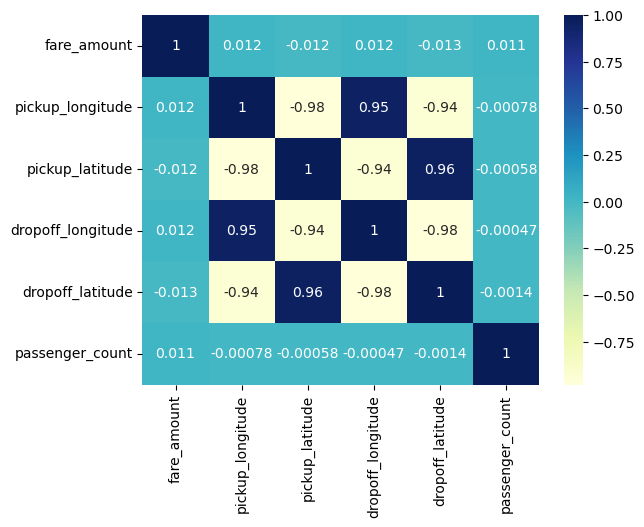

In [32]:
dataplot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)

## Implementing Linear Regression and Random Forest Regression models 

In [33]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [34]:
df['day'] = df['pickup_datetime'].dt.day_name()
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month_name()
df['year'] = df['pickup_datetime'].dt.year

df['hour'] = df['pickup_datetime'].dt.hour

In [35]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekday,month,year,hour
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1,Sunday,6,May,2015,16
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1,Monday,0,March,2010,18
149342,0.11,2010-03-07 19:11:43+00:00,-73.997221,40.721345,-73.997252,40.721344,1,Sunday,6,March,2010,19
163058,2.50,2010-01-04 22:51:22+00:00,-73.987719,40.738253,-73.947331,40.794375,1,Monday,0,January,2010,22
131753,2.50,2009-12-12 22:19:39+00:00,-73.989806,40.738235,-73.977536,40.610928,1,Saturday,5,December,2009,22
...,...,...,...,...,...,...,...,...,...,...,...,...
197493,230.00,2014-09-07 08:39:00+00:00,-73.937765,40.758267,-74.382200,40.700890,2,Sunday,6,September,2014,8
71715,250.00,2013-05-11 00:31:00+00:00,0.000000,0.000000,0.000000,0.000000,1,Saturday,5,May,2013,0
185325,275.00,2013-04-19 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,1,Friday,4,April,2013,0
4292,350.00,2014-10-24 20:20:00+00:00,0.000000,0.000000,0.000000,0.000000,3,Friday,4,October,2014,20


In [36]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [37]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
categorical_columns = x_train.select_dtypes(include='O').columns.tolist()
numerical_columns = x_train.select_dtypes(exclude='O').columns.tolist()

print("Categorical columns are: ",categorical_columns)
print("Numerical columns are: ",numerical_columns)

Categorical columns are:  ['day', 'month']
Numerical columns are:  ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'weekday', 'year', 'hour']


In [40]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for Numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler' , RobustScaler())
])

# Preprocessing for Categorical data
categorical_transformer = Pipeline(steps=[
    ('enc' , OneHotEncoder())
])

# Bundle preprocessing for Numerical and Categorical data
preprocessing = ColumnTransformer(
    transformers=[
        ('num' , numerical_transformer , numerical_columns),
        ('cat' , categorical_transformer , categorical_columns)
    ]
)

In [41]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

## Linear Regression 

In [42]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Model Evaluation Imports
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(x_test)

# Model Evaluation for Linear Regression
print("RMSE: " , np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2: " , r2_score(y_test,y_pred))

RMSE:  9.693862792765588
R2:  0.015408492591311829


## Random Forest Regression 

In [45]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Model Evaluation Imports
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = rf.predict(x_test)

# Model Evaluation for Random Forest Regression
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 4.456678549083893
R2: 0.7918938237526212
